# Tesla Stock Price Prediction with ML

In [6]:
!pip install pystan==3.1.1
# !pip install fbprophet

  Using cached pystan-3.1.1-py3-none-any.whl (13 kB)
  Using cached pysimdjson-3.2.0-cp37-cp37m-win_amd64.whl (149 kB)
  Using cached aiohttp-3.7.4.post0-cp37-cp37m-win_amd64.whl (630 kB)
  Using cached clikit-0.6.2-py2.py3-none-any.whl (91 kB)


ERROR: Could not find a version that satisfies the requirement httpstan<4.5,>=4.4 (from pystan) (from versions: 0.2.5, 0.3.0, 0.3.1, 0.4.0, 0.5.0, 0.6.0, 0.7.2, 0.7.3, 0.7.5, 0.7.6, 0.8.0, 0.9.0, 0.10.1, 1.0.0)
ERROR: No matching distribution found for httpstan<4.5,>=4.4


In [7]:
!pip install fbprophet

  ERROR: Command errored out with exit status 1:
   command: 'C:\Users\itomaru\Anaconda3\envs\tf\python.exe' -u -c 'import io, os, sys, setuptools, tokenize; sys.argv[0] = '"'"'C:\\Users\\itomaru\\AppData\\Local\\Temp\\pip-install-eq8fp8e6\\fbprophet_b403593394f54d9ea7ed6938d6b468b8\\setup.py'"'"'; __file__='"'"'C:\\Users\\itomaru\\AppData\\Local\\Temp\\pip-install-eq8fp8e6\\fbprophet_b403593394f54d9ea7ed6938d6b468b8\\setup.py'"'"';f = getattr(tokenize, '"'"'open'"'"', open)(__file__) if os.path.exists(__file__) else io.StringIO('"'"'from setuptools import setup; setup()'"'"');code = f.read().replace('"'"'\r\n'"'"', '"'"'\n'"'"');f.close();exec(compile(code, __file__, '"'"'exec'"'"'))' bdist_wheel -d 'C:\Users\itomaru\AppData\Local\Temp\pip-wheel-9_nfqxa6'
       cwd: C:\Users\itomaru\AppData\Local\Temp\pip-install-eq8fp8e6\fbprophet_b403593394f54d9ea7ed6938d6b468b8\
  Complete output (805 lines):
  running bdist_wheel
  running build
  running build_py
  creating build
  creating buil


  Using cached fbprophet-0.7.1.tar.gz (64 kB)


  C:\Users\itomaru\Anaconda3\envs\tf\lib\site-packages\pystan\stan\lib\stan_math\stan/math/prim/scal/fun/constants.hpp(14): note: コンパイル対象の関数 テンプレート インスタンス化 'double boost::math::constants::e<double>(void) noexcept' のリファレンスを確認してください
  C:\Users\itomaru\Anaconda3\envs\tf\lib\site-packages\pystan\stan\lib\stan_math\stan/math/prim/scal/fun/grad_reg_lower_inc_gamma.hpp(127): warning C4244: '引数': 'double' から 'int' への変換です。データが失われる可能性があります。
  C:\Users\itomaru\Anaconda3\envs\tf\lib\site-packages\pystan\stan\lib\stan_math\stan/math/rev/scal/fun/gamma_p.hpp(44): note: コンパイル対象の関数 テンプレート インスタンス化 'double stan::math::grad_reg_lower_inc_gamma<double,double>(const T1 &,const T2 &,double,int)' のリファレンスを確認してください
          with
          [
              T1=double,
              T2=double
          ]
  C:\Users\itomaru\Anaconda3\envs\tf\lib\site-packages\pystan\stan\src\stan/mcmc/hmc/hamiltonians/ps_point.hpp(84): warning C4244: '初期化中': 'Eigen::EigenBase<Derived>::Index' から 'int' への変換です。データが失われる可能性があります。
   

          [
              Model=anon_model_f5236004a3fd5b8429270d00efcc0cf9_namespace::anon_model_f5236004a3fd5b8429270d00efcc0cf9
          ]
  C:\Users\itomaru\Anaconda3\envs\tf\lib\site-packages\pystan\stan\src\stan/services/sample/hmc_static_dense_e_adapt.hpp(87): warning C4101: 'e': ローカル変数は 1 度も使われていません。
  C:\Users\itomaru\Anaconda3\envs\tf\lib\site-packages\pystan\stan\src\stan/services/sample/hmc_static_dense_e_adapt.hpp(177): note: コンパイル対象の関数 テンプレート インスタンス化 'int stan::services::sample::hmc_static_dense_e_adapt<Model>(Model &,stan::io::var_context &,stan::io::var_context &,unsigned int,unsigned int,double,int,int,int,bool,int,double,double,double,double,double,double,double,unsigned int,unsigned int,unsigned int,stan::callbacks::interrupt &,stan::callbacks::logger &,stan::callbacks::writer &,stan::callbacks::writer &,stan::callbacks::writer &)' のリファレンスを確認してください
          with
          [
              Model=anon_model_f5236004a3fd5b8429270d00efcc0cf9_namespace::anon_model_f52360


  Running setup.py clean for fbprophet
Failed to build fbprophet
    Running setup.py install for fbprophet: started
    Running setup.py install for fbprophet: finished with status 'error'


In [8]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
from fbprophet import Prophet

data = pd.read_csv("TSLA.csv")
data.head()

,Date,Open,High,Low,Close,Adj Close,Volume
0,2020-08-24,425.256012,425.799988,385.503998,402.839996,402.839996,100318000
1,2020-08-25,394.977997,405.589996,393.600006,404.667999,404.667999,53294500
2,2020-08-26,412.000000,433.200012,410.726013,430.634003,430.634003,71197000
3,2020-08-27,436.092010,459.119995,428.500000,447.750000,447.750000,118465000
4,2020-08-28,459.023987,463.697998,437.303986,442.679993,442.679993,100406000


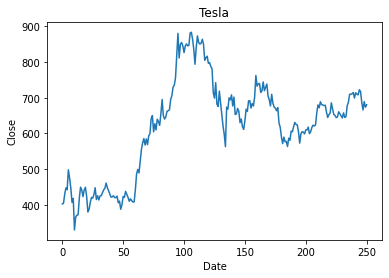

In [9]:
close = data['Close']
ax = close.plot(title='Tesla')
ax.set_xlabel('Date')
ax.set_ylabel('Close')
plt.show()

In [10]:
data["Date"] = pd.to_datetime(data["Date"], infer_datetime_format=True)
data = data[["Date", "Close"]]

In [11]:
data = data.rename(columns={"Date" : "ds", "Close" : "y" })

In [12]:
model = Prophet()
model.fit(data)
predict = model.make_future_dataframe(periods=365)
forcast = model.predict(predict)
forcast[["ds", "yhat", "yhat_lower", "yhat_upper"]].tail()

INFO:fbprophet:Disabling yearly seasonality. Run prophet with yearly_seasonality=True to override this.
INFO:fbprophet:Disabling daily seasonality. Run prophet with daily_seasonality=True to override this.


,ds,yhat,yhat_lower,yhat_upper
611,2022-08-16,947.059513,-97.130288,2006.802095
612,2022-08-17,946.057548,-94.325155,2000.958338
613,2022-08-18,946.472352,-108.001891,2005.620468
614,2022-08-19,948.645667,-89.983993,2009.665532
615,2022-08-20,946.037522,-104.911008,2032.361040


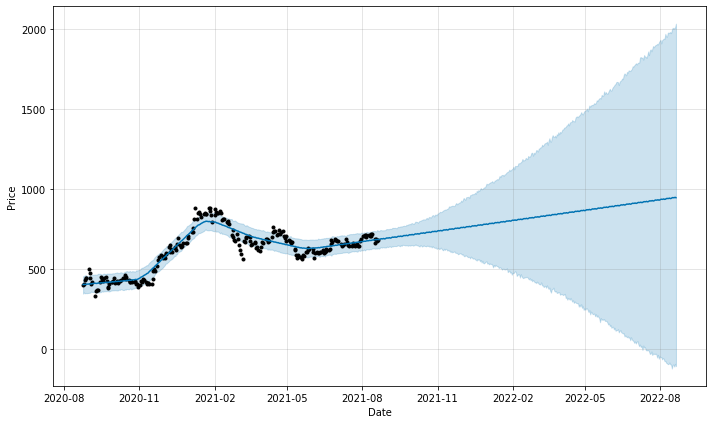

In [13]:
graph = model.plot(forcast, xlabel="Date", ylabel="Price")